# CH08-2_합성곱 신경망을 사용한 이미지 분류

##### 데이터 준비

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


#### 합성곱 신경망(CNN) 만들기

In [2]:
# 합성곱층 (필터 32개)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28, 28, 1)))

In [3]:
# 풀링층
model.add(keras.layers.MaxPooling2D(2))

(14, 14, 32)

In [4]:
# 두번째 합성곱+풀링층 (필터 64개)
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',
                              padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

(7, 7, 64)

In [5]:
# 3차원 특성맵 일렬로 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(keras.layers.Dropout(0.4)) # 과대적합 방지
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층(다중 분류)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

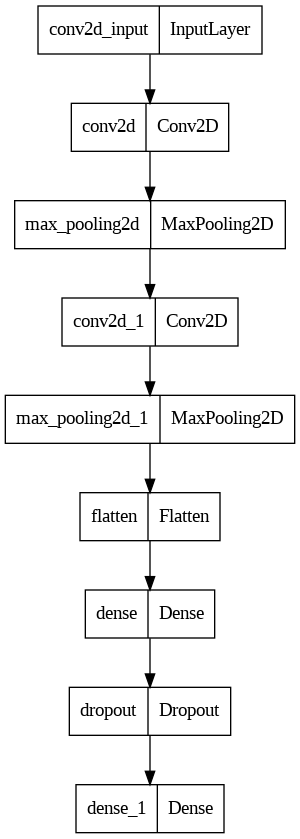

In [7]:
keras.utils.plot_model(model) # 층의 이름 | 클래스

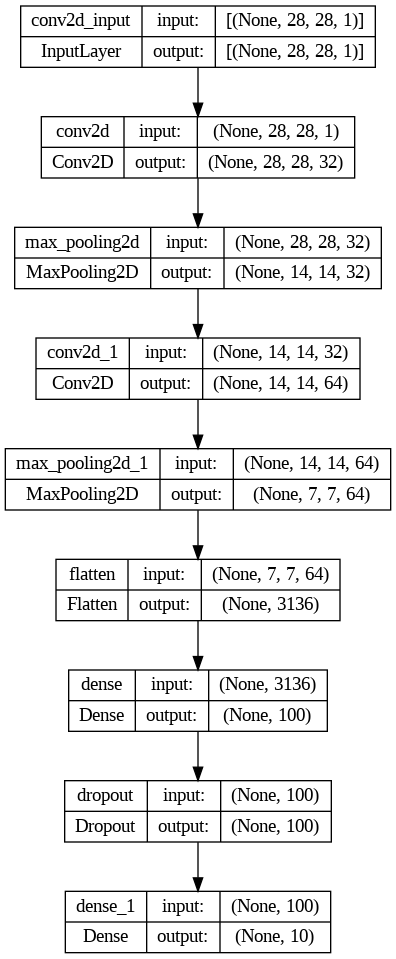

In [8]:
keras.utils.plot_model(model, show_shapes=True)

##### 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.5211 - accuracy: 0.8106 - val_loss: 0.3332 - val_accuracy: 0.8764
Epoch 2/20
1500/1500 [==============================] - 44s 30ms/step - loss: 0.3497 - accuracy: 0.8741 - val_loss: 0.2918 - val_accuracy: 0.8910
Epoch 3/20
1500/1500 [==============================] - 44s 30ms/step - loss: 0.2970 - accuracy: 0.8930 - val_loss: 0.2602 - val_accuracy: 0.9030
Epoch 4/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2647 - accuracy: 0.9038 - val_loss: 0.2520 - val_accuracy: 0.9072
Epoch 5/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2405 - accuracy: 0.9116 - val_loss: 0.2430 - val_accuracy: 0.9097
Epoch 6/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2217 - accuracy: 0.9175 - val_loss: 0.2244 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2038 - accuracy: 0.9256 - val_loss: 0.2304 -

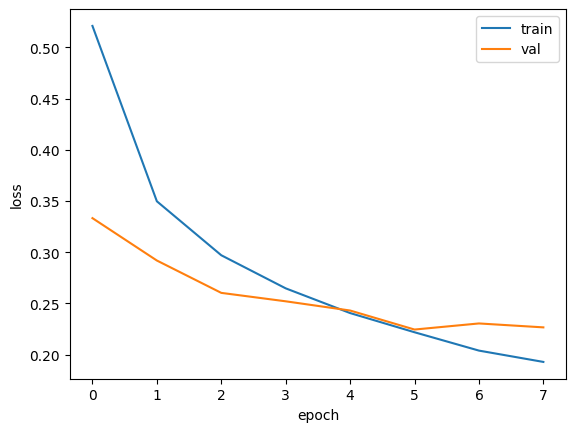

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

8번째 에포크에서 조기종료, 6번째 에포크가 최적
(patience=2)

In [ ]:
# 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 8ms/step - loss: 0.2244 - accuracy: 0.9183


[0.2244005799293518, 0.9183333516120911]

fit() 메서드에서 6번째 에포크와 동일

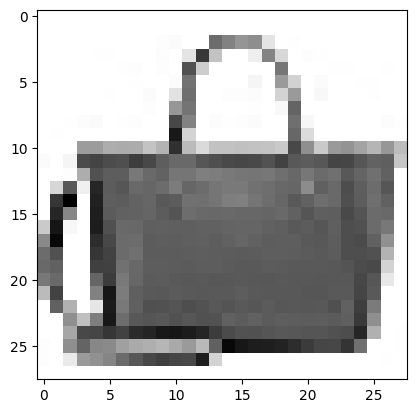

In [ ]:
# 새로운 데이터 예측
plt.imshow(val_scaled[0].reshape(-1, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 84ms/step
[[7.42069302e-15 1.05585786e-19 2.33799027e-17 2.99166028e-16
  3.43607453e-14 2.38494798e-14 3.10939019e-14 7.36910641e-13
  1.00000000e+00 5.60260050e-14]]


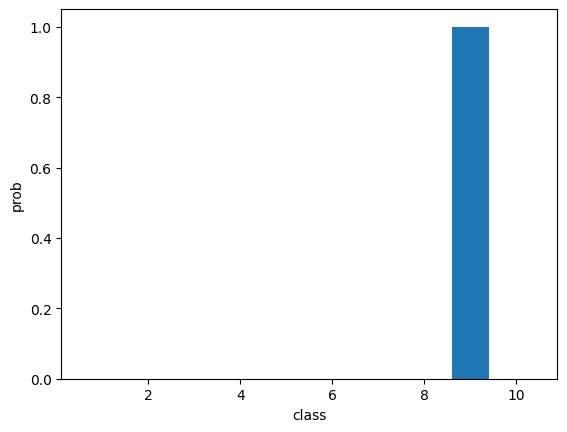

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [ ]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2401 - accuracy: 0.9119


[0.2400975078344345, 0.911899983882904]

-----------------------------------------------

# CH08-3_합성곱 신경망의 시각화

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
print(type(model.layers))

<class 'list'>


In [ ]:
# 첫 번째 합성곱 층의 가중치, 절편
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


가중치 : 커널크기 (3, 3) , 입력의 깊이 1, 필터개수 32개

절편 : 필터 1개마다 절편 있으므로 (32, )

In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019767083 0.23688751


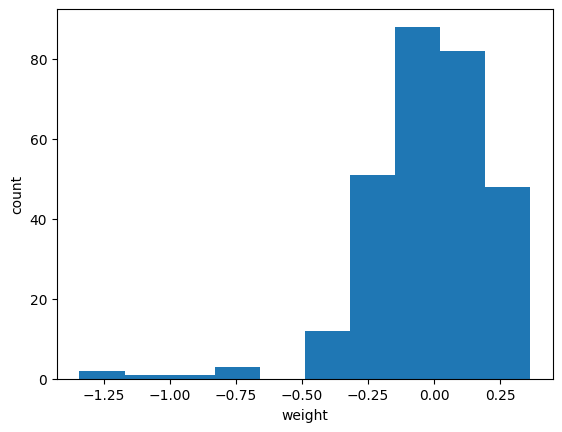

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
conv_weights[:,:,0,1].shape

(3, 3)

In [ ]:
conv_weights[:,:,:,1].shape

(3, 3, 1)

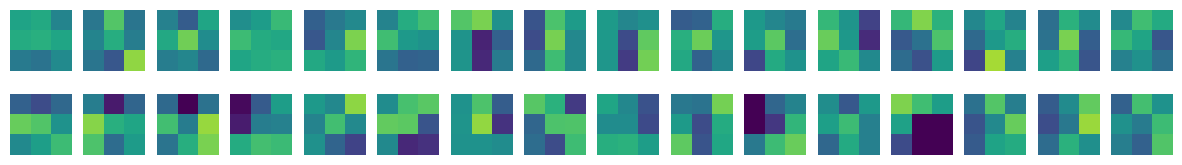

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2) :
  for j in range(16) :
    axs[i,j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

##### 훈련하지 않은 빈 합성공 신경망

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.005470689 0.07967047


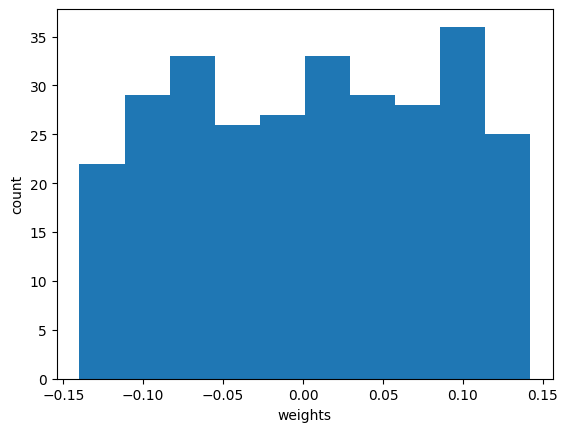

In [ ]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

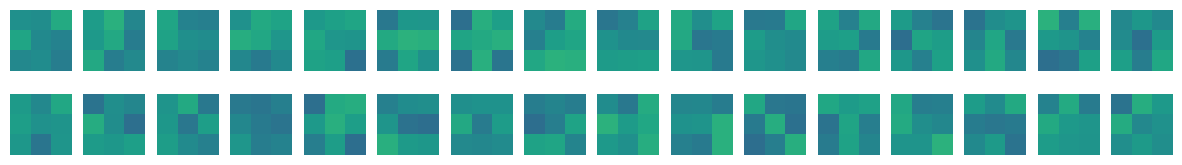

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2) :
  for j in range(16) :
    axs[i,j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

#### 함수 API
 - 합성곱 층에서 출력된 특성 맵

In [ ]:
print(model.input) # 입력

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

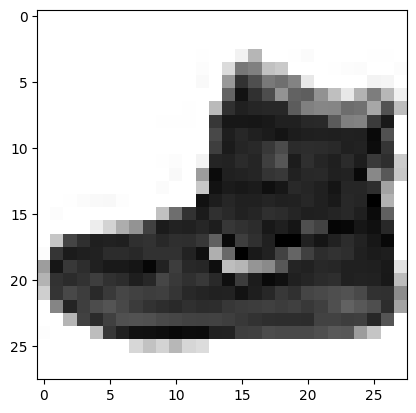

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 34ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


세임패딩과 32개 필터 -> (28, 28, 32)

샘플 하나 -> 1

In [ ]:
feature_maps[0,:,:,1].shape

(28, 28)

In [ ]:
feature_maps[:,:,:,1].shape

(1, 28, 28)

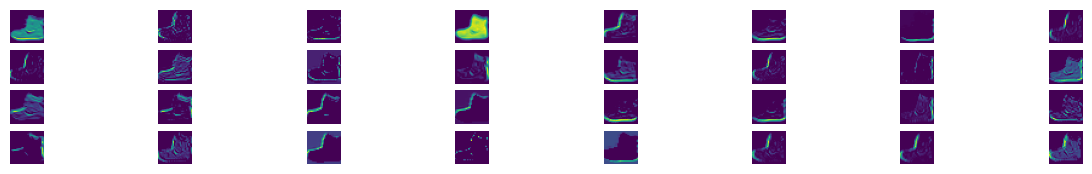

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,2))
for i in range(4) :
  for j in range(8) :
    axs[i,j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
# 두번째 합성곱 층
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 42ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


샘플 하나 -> 1

첫번째 합성곱층 -> 첫번째 풀링층 (14, 14, 32)

두번째 합성곱층 필터 64개

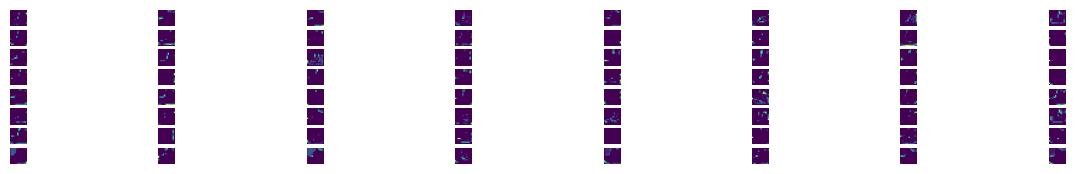

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(15,2))
for i in range(8) :
  for j in range(8) :
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()